In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [158]:
df.shape

(210, 9)

There are total 210 rows and 7 columns.

In [159]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
H_clusters,210.0,1.666667,0.472531,1.0000,1.00000,2.00000,2.000000,2.0000
clusters,210.0,2.314286,0.915724,1.0000,1.00000,3.00000,3.000000,3.0000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

spending
Skew : 0.4


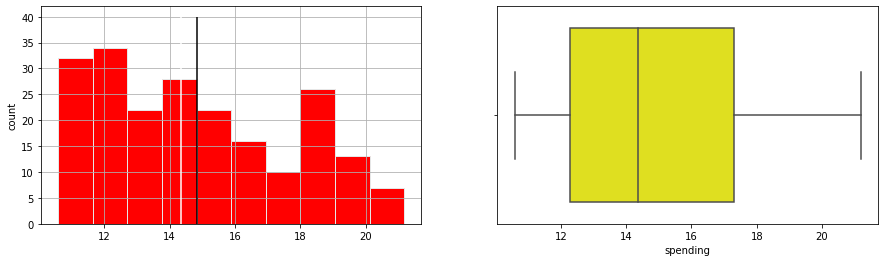

advance_payments
Skew : 0.39


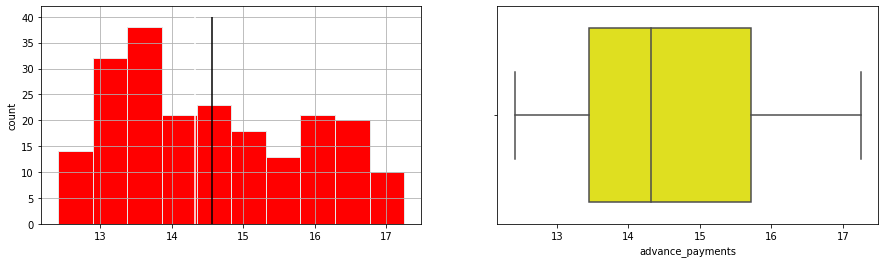

probability_of_full_payment
Skew : -0.54


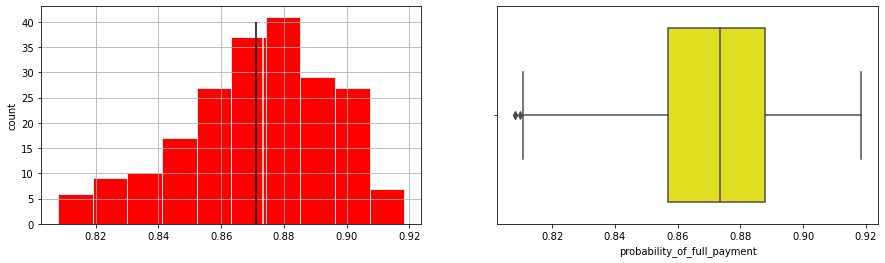

current_balance
Skew : 0.53


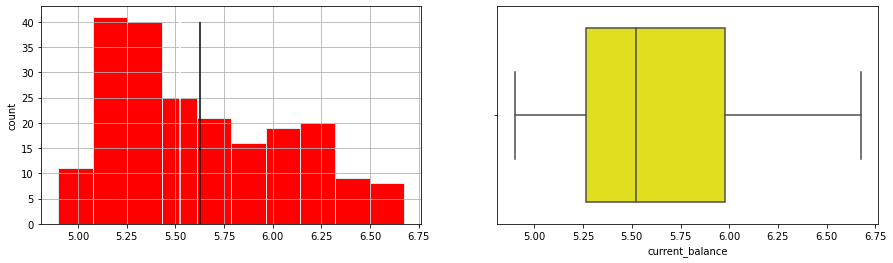

credit_limit
Skew : 0.13


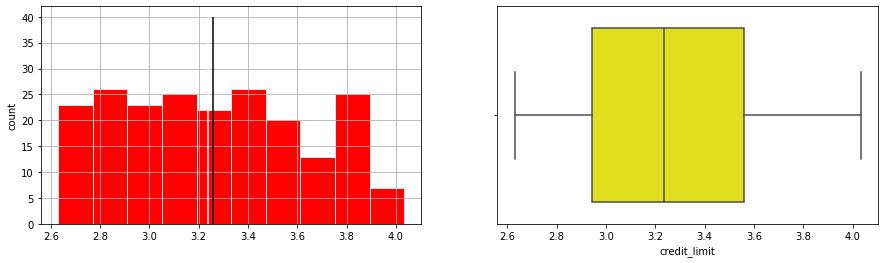

min_payment_amt
Skew : 0.4


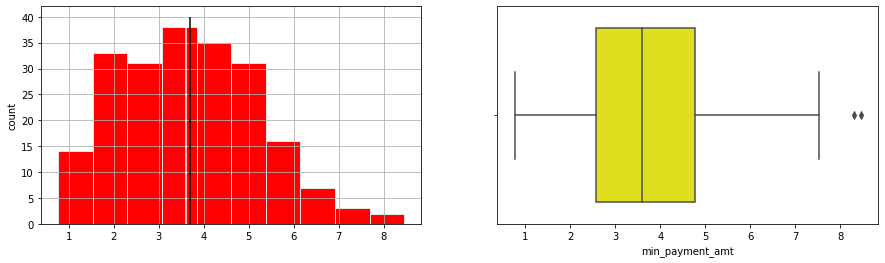

max_spent_in_single_shopping
Skew : 0.56


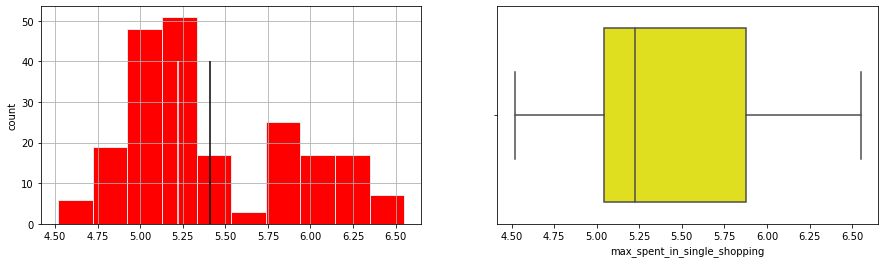

In [9]:
cont_cols = list(df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(df[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(df[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='Yellow')
    plt.show()

The diagram shows that Spending,Advance payments, Current balance,Credit limit, min payment amount, max spent in single shopping are right skewed whereas only probability of full payment is left skewed.

The variables Probability of full payment and min payment amount have outliers.

The variables Spending,Advance payments, Current balance,Credit limit, max spent in single shpping does not posses outliers.

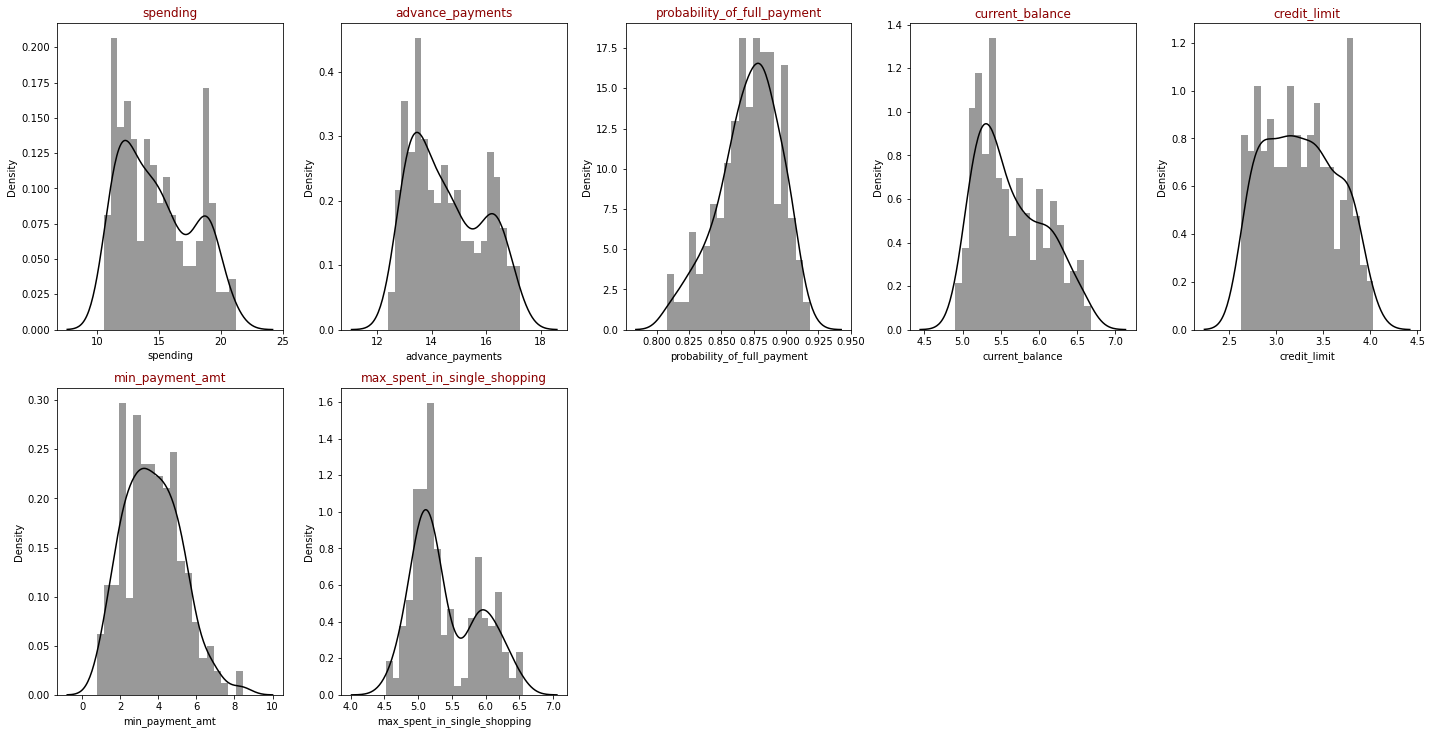

In [28]:
data_scatter=df.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='DarkRed')
plt.tight_layout()


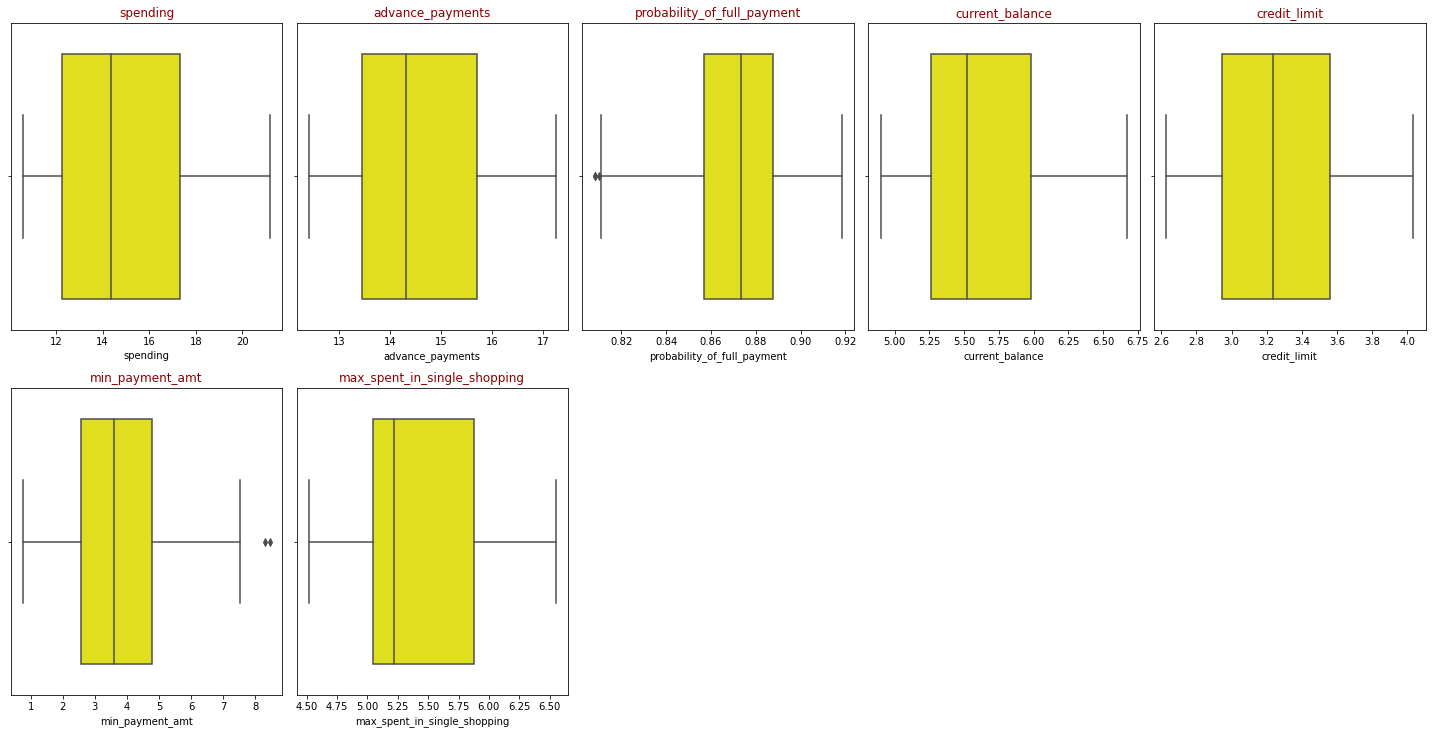

In [22]:
data_scatter=df.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(data_scatter[data_scatter.columns[i]],color= 'Yellow')
    ax.set_title(data_scatter.columns[i],color='DarkRed')
plt.tight_layout()

# Bivariate analysis

spending vs max_spent_in_single_shopping


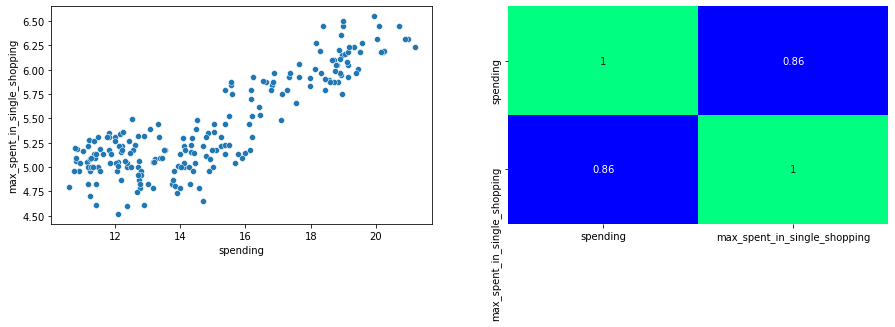

advance_payments vs spending


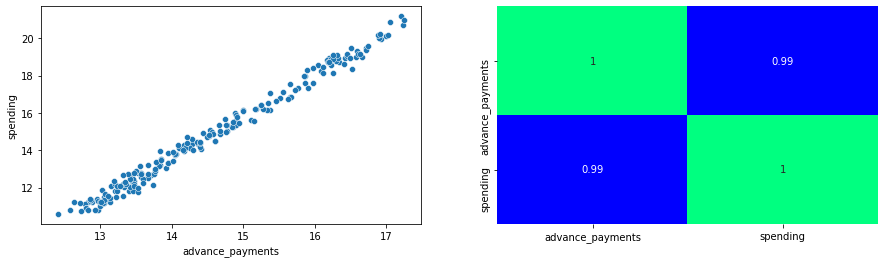

probability_of_full_payment vs advance_payments


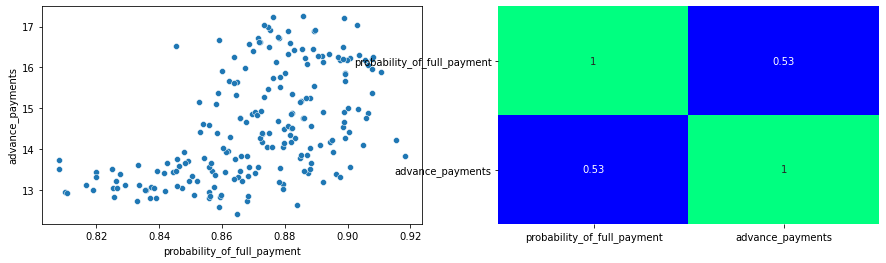

current_balance vs probability_of_full_payment


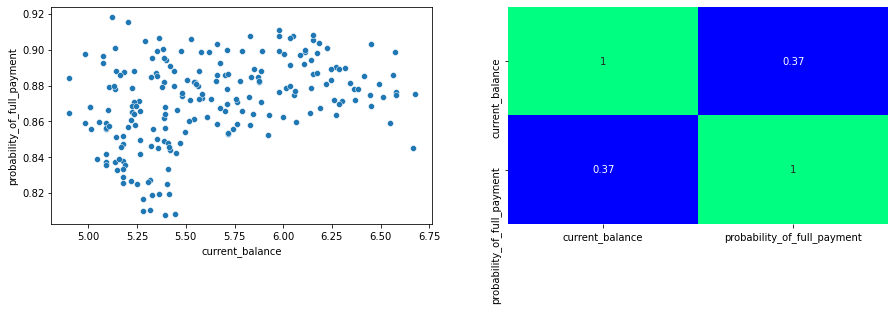

credit_limit vs current_balance


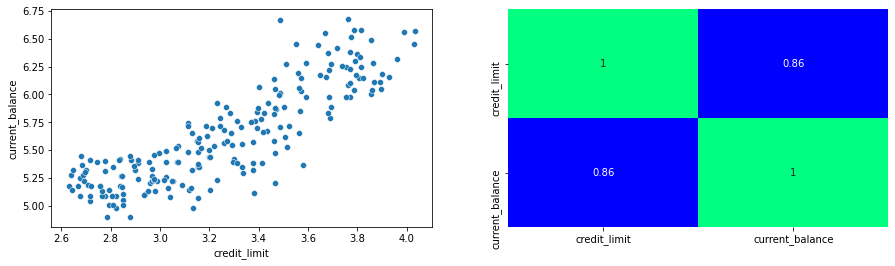

min_payment_amt vs credit_limit


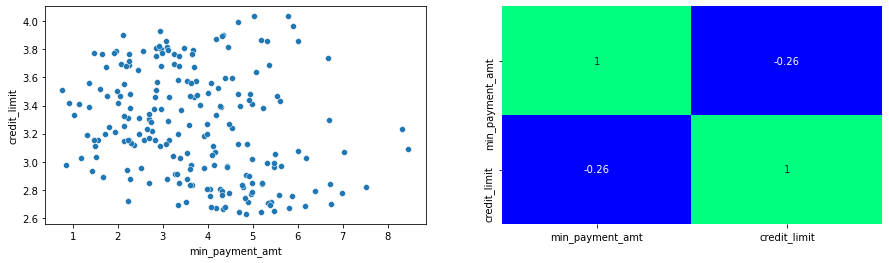

max_spent_in_single_shopping vs min_payment_amt


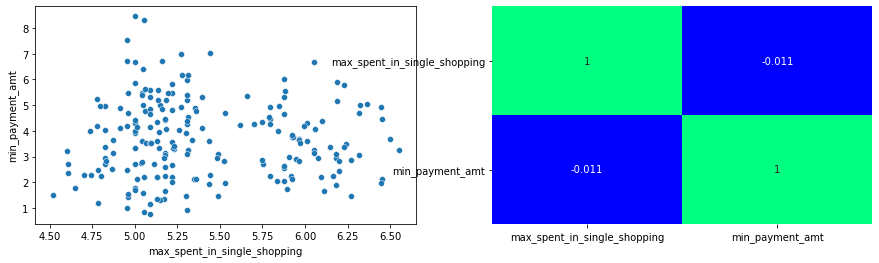

In [29]:
sns.color_palette("tab10")

cont_cols = list(df.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(df[cont_cols[col]],df[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(df[cont_cols[col]],df[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

<AxesSubplot:>

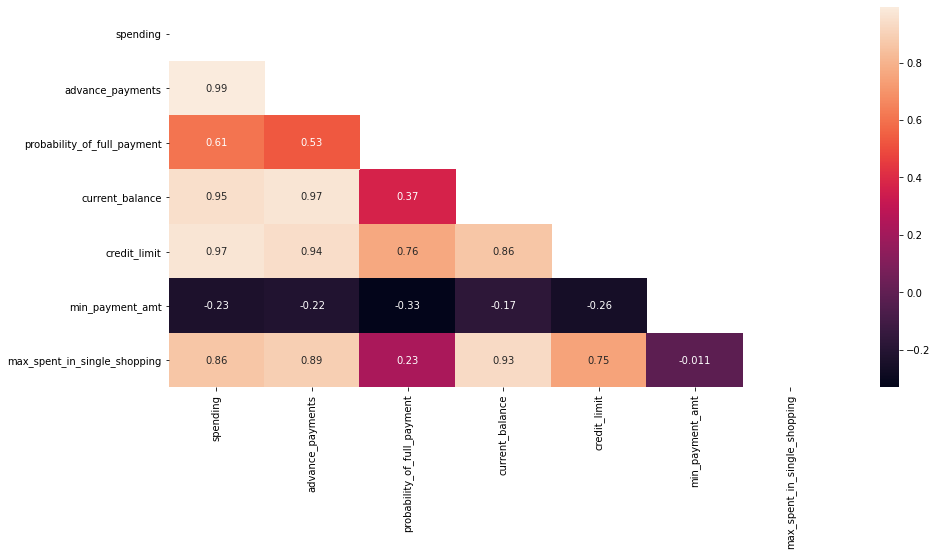

In [31]:
sns.color_palette("tab10")
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot = True,mask=mask)

There is high positive correlation among following variables.

1.Spending and advance payents

2.Spending and current balance

3.Spending and credit limit

4.Spending and max spent in single shopping

5.Advance payents and Current balance

6.Advance payents and credit limit

7.Advance payents and max spent in single shopping

8.Probability of full payment and credit limit

9.Current balance and credit limit

10.Current balance and max spent in single shopping

11.Credit limit and max spent in single shopping

# Multivariate analysis

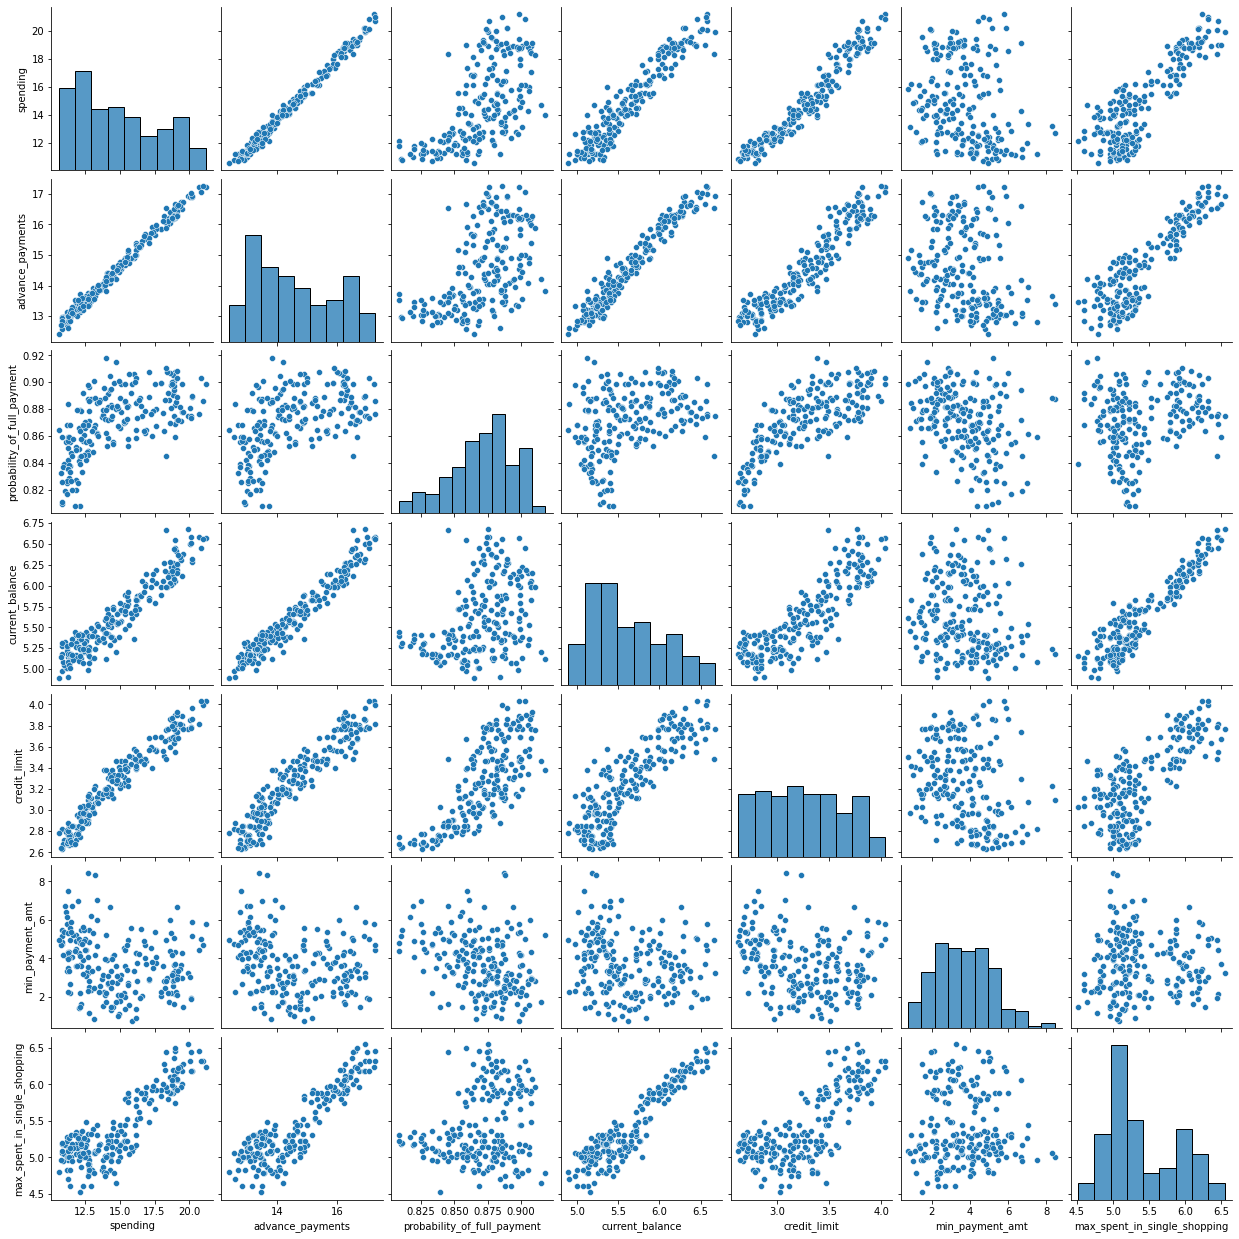

In [30]:
sns.pairplot(df);

### 1.2  Do you think scaling is necessary for clustering in this case? Justify

Before Scaling

In [32]:
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [10]:
from scipy.stats import zscore 
scaled_df = df.apply(zscore)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(df),columns=cont_cols)
data.head().T

,0,1,2,3,4
spending,1.754355,0.393582,1.413300,-1.384034,1.082581
advance_payments,1.811968,0.253840,1.428192,-1.227533,0.998364
probability_of_full_payment,0.178230,1.501773,0.504874,-2.591878,1.196340
current_balance,2.367533,-0.600744,1.401485,-0.793049,0.591544
credit_limit,1.338579,0.858236,1.317348,-1.639017,1.155464
min_payment_amt,-0.298806,-0.242805,-0.221471,0.987884,-1.088154
max_spent_in_single_shopping,2.328998,-0.538582,1.509107,-0.454961,0.874813


After Scaling

In [36]:
data.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
H_clusters                      0.223285
dtype: float64

To bring all variables on a same scale, scaling is performed. In scaling, data on all the dimensions are subtracted from their means to shift the data points to the origin. i.e. the data is centered on the origins.Comparing the variables with each other won't be fruitful until and unless all of them are compared on a same scale. Scaling helps in bringing all variables on a same scale by shifting data points to origin.

As we can see from the above data df, data after scaling will transform every value in such a way that the mean will be 0 and the standard deviation will be 1.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
HClust = linkage(data, method = 'ward')

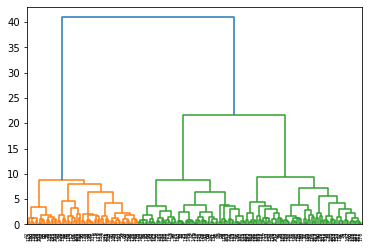

In [39]:
dend = dendrogram(HClust)

Plotting the truncated dendogram with last 25 characters.

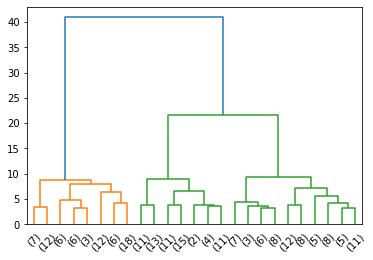

In [40]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,
                 )

### Identifying the cluster

In [41]:
from scipy.cluster.hierarchy import fcluster

In [42]:
clusters_1 = fcluster(HClust, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [43]:
data['H_clusters'] = clusters_1

In [44]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [45]:
data.to_csv('H_Cluster.csv')

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

Performing the Kmeans clustering,

In [54]:
from sklearn.cluster import KMeans 
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(data)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [55]:
k_means2.inertia_

665.0057893268286

Finding the WITHIN SUM OF SQUARES {WSS} for 2-15 characters.

In [56]:
wss =[] 

In [57]:
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(data)
    wss.append(KM.inertia_)

In [58]:
wss

[1516.6666666666667,
 665.0057893268286,
 433.85145245276095,
 377.13478979189307,
 333.902763357778,
 296.3349390913217,
 269.5800881871719,
 244.86549935620545,
 226.73525234082194,
 207.68751350680498,
 194.77119122773252,
 184.25765396802467,
 177.8626310708465,
 167.57224717944973]

### Elbow curve

Plotting the WITHIN SUM OF SQUARES {WSS} using the values of "Inertia" computed above.

In [72]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]

<AxesSubplot:>

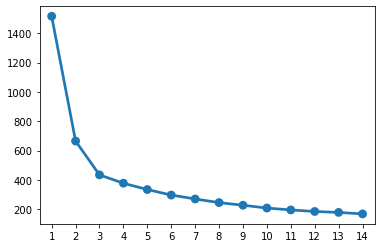

In [73]:
sns.pointplot(a, wss)

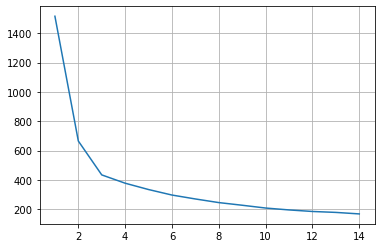

In [59]:
plt.plot(range(1,15), wss)
plt.grid()
plt.show()

In [60]:
df_Kmeans = data.drop('H_clusters',axis=1)

#####  Checking K_means
When n_cluster, K=2

In [74]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(data)
labels = k_means.labels_

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score

Let us check the silhouette score and silhouette width for 2 clusters.

In [76]:
silhouette_score(data,labels)

0.47879635388707587

In [77]:
silhouette_samples(data,labels).min()

0.02432155080468075

 When n_cluster, K=3

In [78]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data)
labels = k_means.labels_

In [79]:
silhouette_score(data,labels)

0.4131148015541322

In [80]:
silhouette_samples(data,labels).min()

-0.05774850963307169

 When n_cluster, K=4

In [87]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data)
labels = k_means.labels_

In [88]:
silhouette_score(data,labels)

0.3341327550191442

In [89]:
silhouette_samples(data,labels).min()

-0.042641346547198096

Silhouette score is better for 2 cluster than others. So, the final cluster will be 2.

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

###  Cluster Profile

In [90]:
from scipy.cluster.hierarchy import fcluster

In [91]:
link_method = linkage(df.iloc[:,1:6], method = 'average')

In [92]:
labelList = np.array(df)
labelList

array([[19.94  , 16.92  ,  0.8752, ...,  3.252 ,  6.55  ,  1.    ],
       [15.99  , 14.89  ,  0.9064, ...,  3.336 ,  5.144 ,  2.    ],
       [18.95  , 16.42  ,  0.8829, ...,  3.368 ,  6.148 ,  1.    ],
       ...,
       [14.03  , 14.16  ,  0.8796, ...,  1.717 ,  5.001 ,  2.    ],
       [16.12  , 15.    ,  0.9   , ...,  2.27  ,  5.443 ,  1.    ],
       [15.57  , 15.15  ,  0.8527, ...,  2.64  ,  5.879 ,  2.    ]])

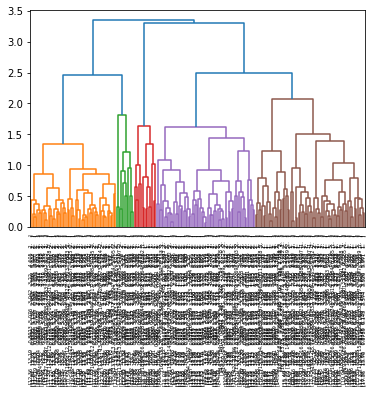

In [93]:
dend = dendrogram(link_method,labels = labelList)

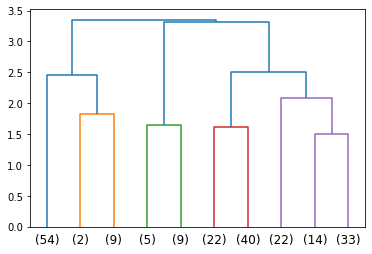

In [94]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )

In [95]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3,
       2, 3, 3, 1, 3, 1, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3,
       3, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 2, 1, 1, 3,
       3, 3, 2, 1, 1, 3, 3, 1, 1, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 3, 1, 3, 2, 1, 2, 3, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       3, 3, 3, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1,
       3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3], dtype=int32)

Appending clusters to the original dataset

In [96]:
df['clusters'] = clusters

In [97]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,3


In [98]:
df.clusters.value_counts().sort_index()

1     65
2     14
3    131
Name: clusters, dtype: int64

In [99]:
clust_profile=df.iloc[:,1:9].groupby('clusters').mean()
clust_profile['freq']=df.clusters.value_counts().sort_index()
clust_profile

,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,freq
clusters,,,,,,,,
1,13.248615,0.850708,5.223462,2.863923,5.075877,5.094338,2.000000,65
2,16.450714,0.886693,6.251286,3.776071,5.392357,6.070714,1.071429,14
3,15.007481,0.879389,5.762969,3.399137,2.836773,5.492924,1.564885,131


Cluster 1: Bank with least credit card usage (Poor performing Banks/new Banks) 

Cluster 2: Bank with high credit card usage (Top Banks)

Cluster 3: Bank with medium credit card usage (Medium performing Banks)

### Using Agglomerative Clustering

In [160]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 0 1 1 1 0 0 1 1 0 0 0 2 0 0 1 0 1 0 2
 1 0 0 1 0 0 0 0 0 2 1 0 0 0 0 1 1 2 0 1 1 0 0 0 1 0 1 0 0 0 0 2 2 1 1 0 0
 0 2 1 1 0 0 1 1 2 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 2 1 2 0 2 0 1 1 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 2 0 1 0 1 0 0 0 1 0 0 0 0 0 0]


In [163]:
df["Agglo_CLusters"]=Cluster_agglo

In [164]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'H_clusters', 'clusters',
       'Agglo_CLusters'],
      dtype='object')

In [166]:
agglo_data=df.drop(["clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Freq
Agglo_CLusters,,,,,,,,,
0,15.853817,15.007481,0.879389,5.762969,3.399137,2.836773,5.492924,1.564885,131
1,11.897538,13.248615,0.850708,5.223462,2.863923,5.075877,5.094338,2.000000,65
2,19.127857,16.450714,0.886693,6.251286,3.776071,5.392357,6.070714,1.071429,14


The banks in Agglo Cluster 2 is high in all the categories compared to other banks .Relatively large number of customers are visiting these banks. So,the credit card usage can be increased simultaneously with the customers of this bank.

The banks in Agglo Cluster 0 is high followed by Agglo cluster 2  in all the categories compared to Agglo cluster1 .Relatively moderate number of customers are visiting these banks. So,the bank has to focus slightly on credit card usage to the customers.

The banks in Agglo Cluster 1 is low in all the categories compared to other banks .Relatively less number of customers are visiting these banks. So,the bank has to focus more on credit card usage to the customers. As they can create awareness and safety about credit card usage to the customers

Banks in cluster 0 and 1, needs to focus on their  banking facilities regarding credit card.

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [227]:
DF= pd.read_csv("insurance_part2_data.csv")
DF.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [228]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


Changing the categorical datatype into numerical datatype,

In [229]:
for feature in DF.columns: 
    if DF[feature].dtype == 'object':
        DF[feature] = pd.Categorical(DF[feature]).codes 

In [230]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [231]:
DF.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [232]:
DF.shape

(3000, 10)

There are total 3000 rows and 10 columns.

In [233]:
DF = DF.dropna()


In [234]:
DF.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

##### Univariate analysis

Age
Skew : 1.15


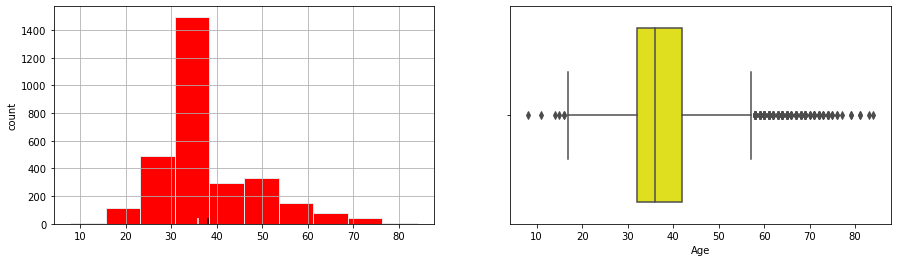

Agency_Code
Skew : -0.16


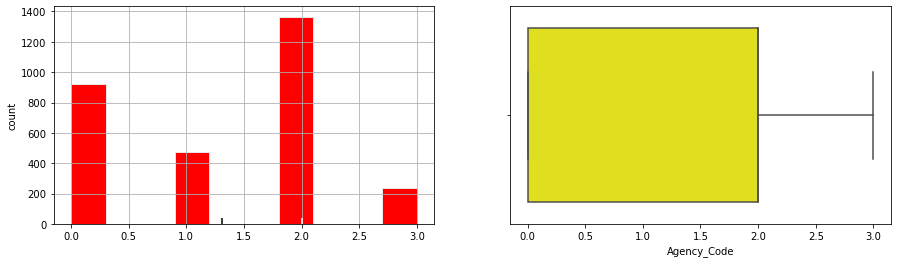

Type
Skew : -0.46


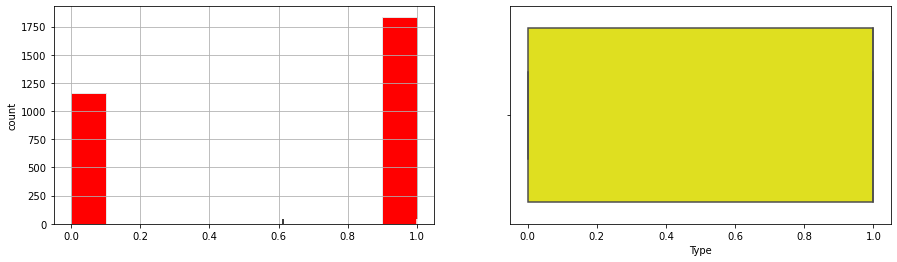

Claimed
Skew : 0.83


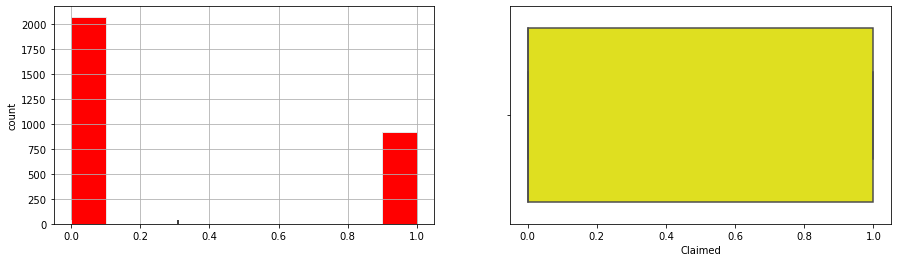

Commision
Skew : 3.15


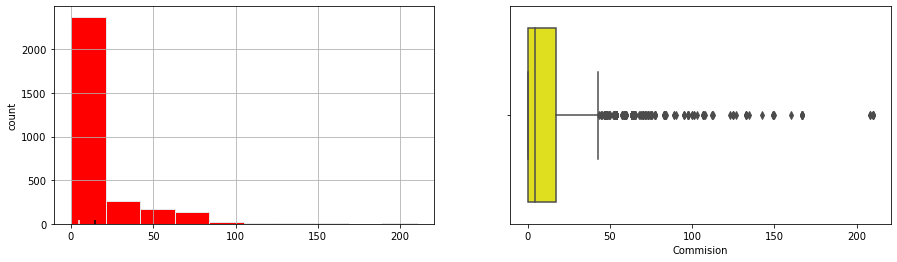

Channel
Skew : -7.89


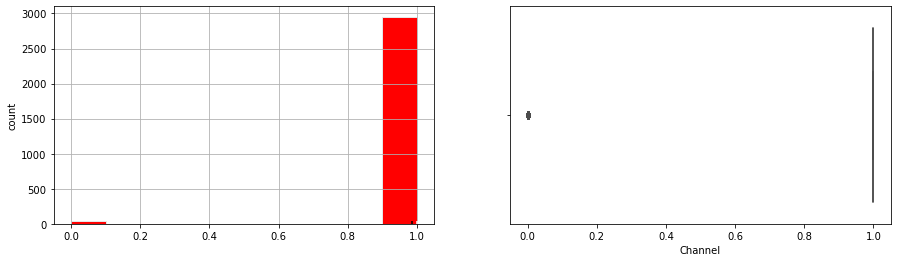

Duration
Skew : 13.78


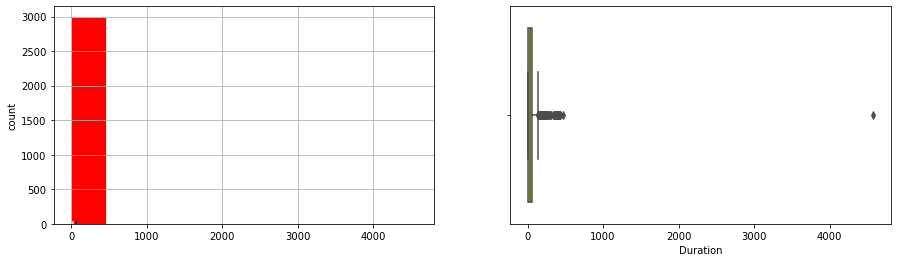

Sales
Skew : 2.38


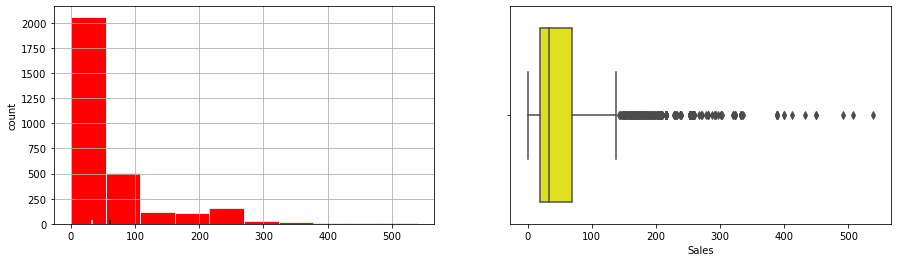

Product Name
Skew : 0.43


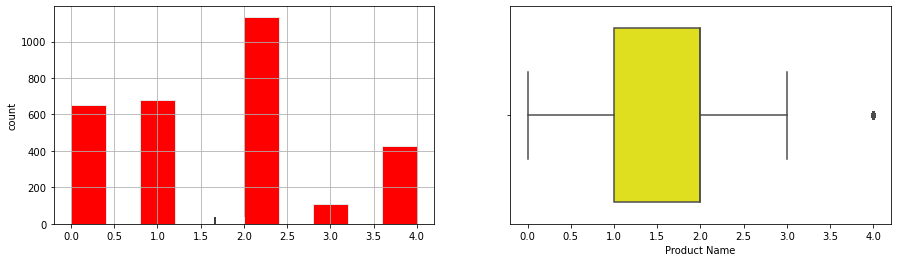

Destination
Skew : 2.19


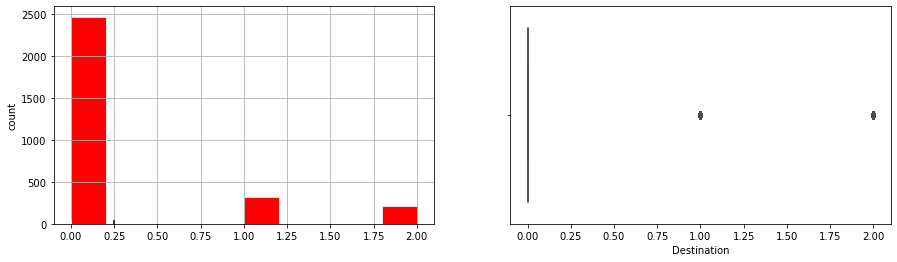

In [235]:
cont_cols = list(DF.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(DF[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    DF[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(DF[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(DF[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(DF[col],color='Yellow')
    plt.show()

The diagram shows that Age, Claimed, Commission, Duration, Sales, Product Name,Destination are right skewed  whereas Agency code, Type, Channel are left skewed.

The Duration and commission have highly skewed.

The variables Age, Commission, Channel,Duration, Sales,Product Name, Destination have outliers.

The variables Agency code, Type, Claimed does not posses outliers.

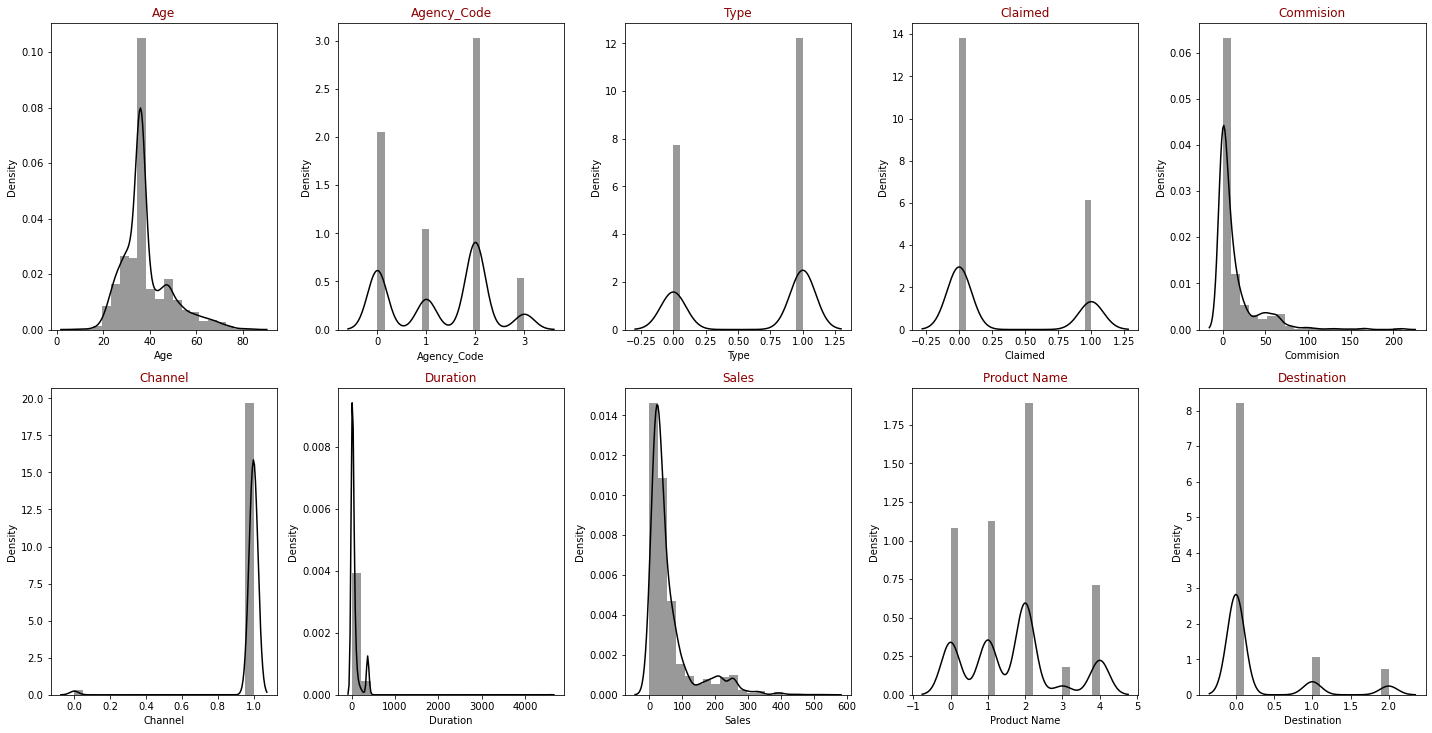

In [236]:
data_scatter=DF.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='DarkRed')
plt.tight_layout()


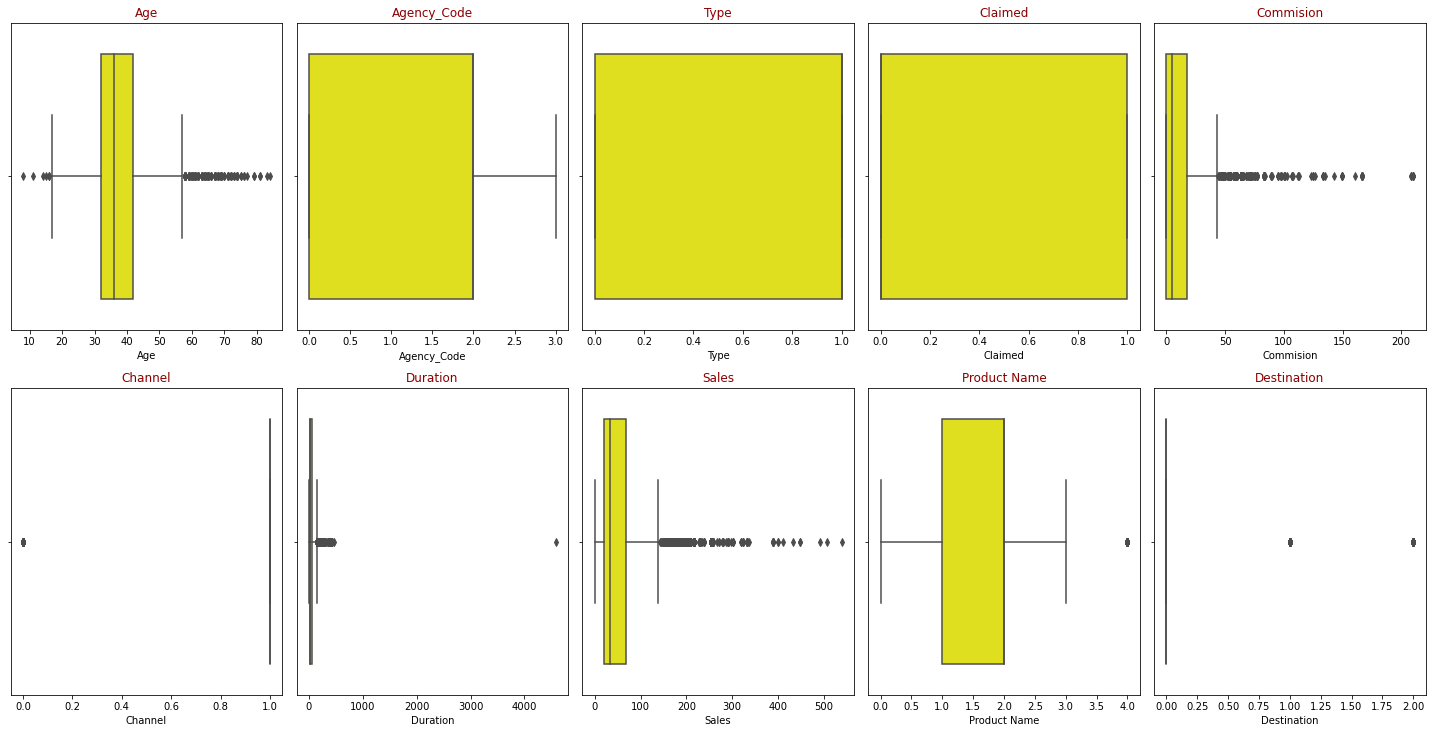

In [237]:
data_scatter=DF.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(data_scatter[data_scatter.columns[i]],color= 'Yellow')
    ax.set_title(data_scatter.columns[i],color='DarkRed')
plt.tight_layout()

## Bivariate analysis

Age vs Destination


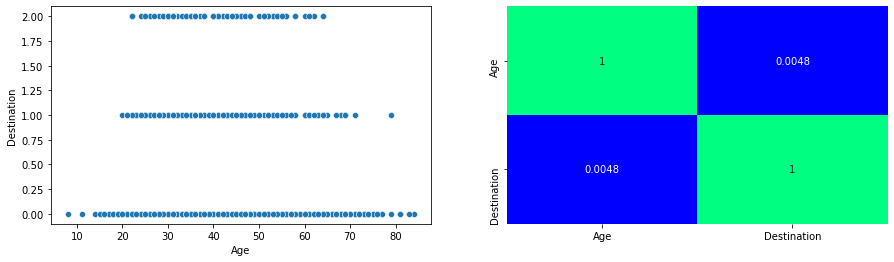

Agency_Code vs Age


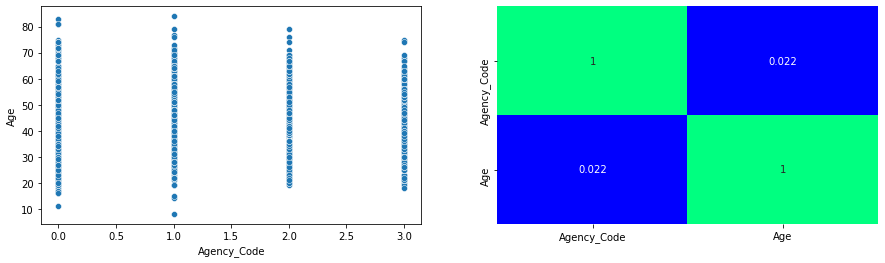

Type vs Agency_Code


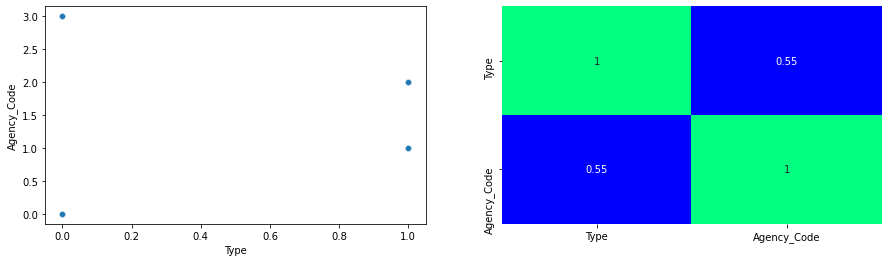

Claimed vs Type


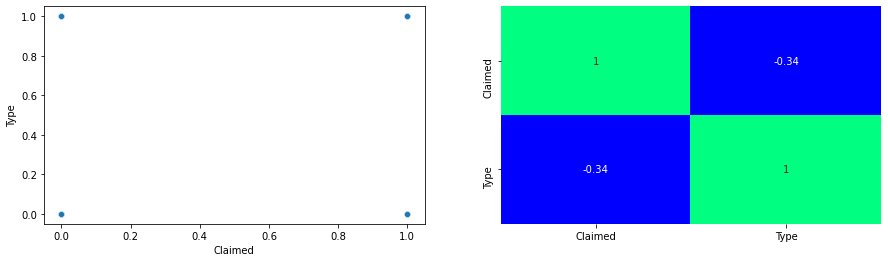

Commision vs Claimed


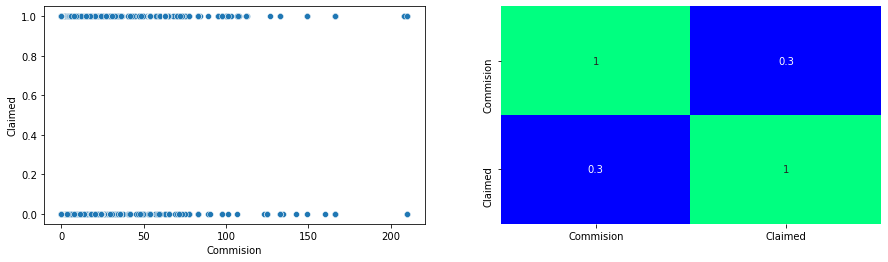

Channel vs Commision


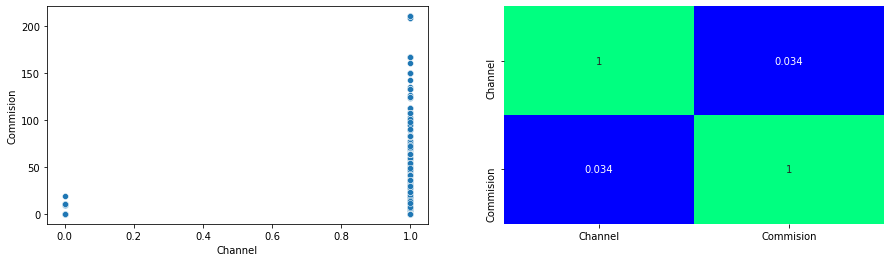

Duration vs Channel


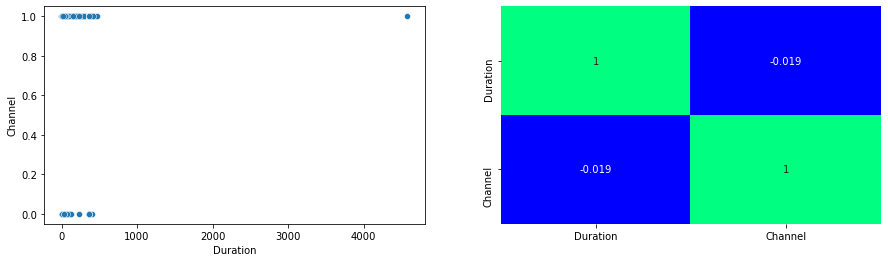

Sales vs Duration


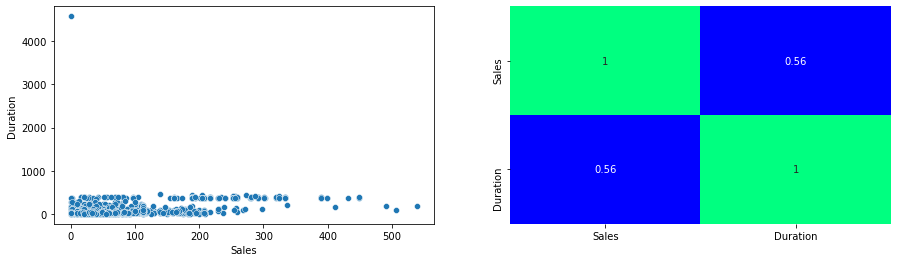

Product Name vs Sales


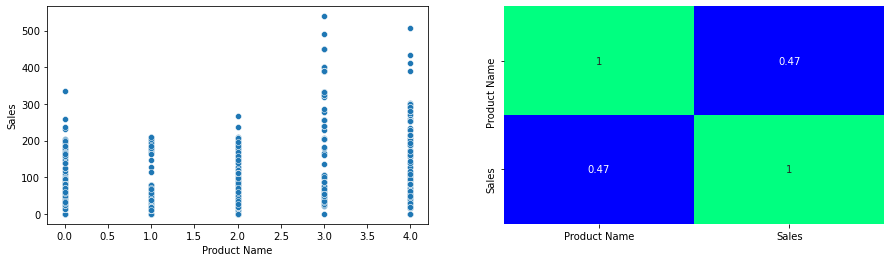

Destination vs Product Name


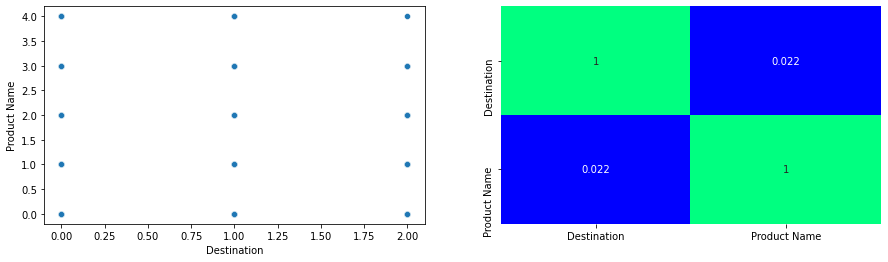

In [239]:
sns.color_palette("tab10")

cont_cols = list(DF.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(DF[cont_cols[col]],DF[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(DF[cont_cols[col]],DF[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

<AxesSubplot:>

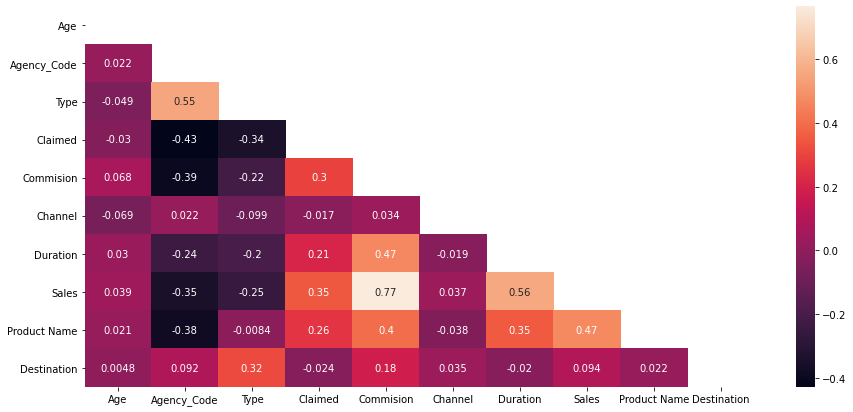

In [141]:
sns.color_palette("tab10")
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(DF.corr(), dtype=bool))
sns.heatmap(DF.corr(),annot = True,mask=mask)

There is high positive correlation among following variables.

1.Agency code and Type

2.Commission and duration

3.Commission and Sales

4.Commission and Product Name

5.Duration and Sales

6.Sales and Product Name

## Multivariate analysis

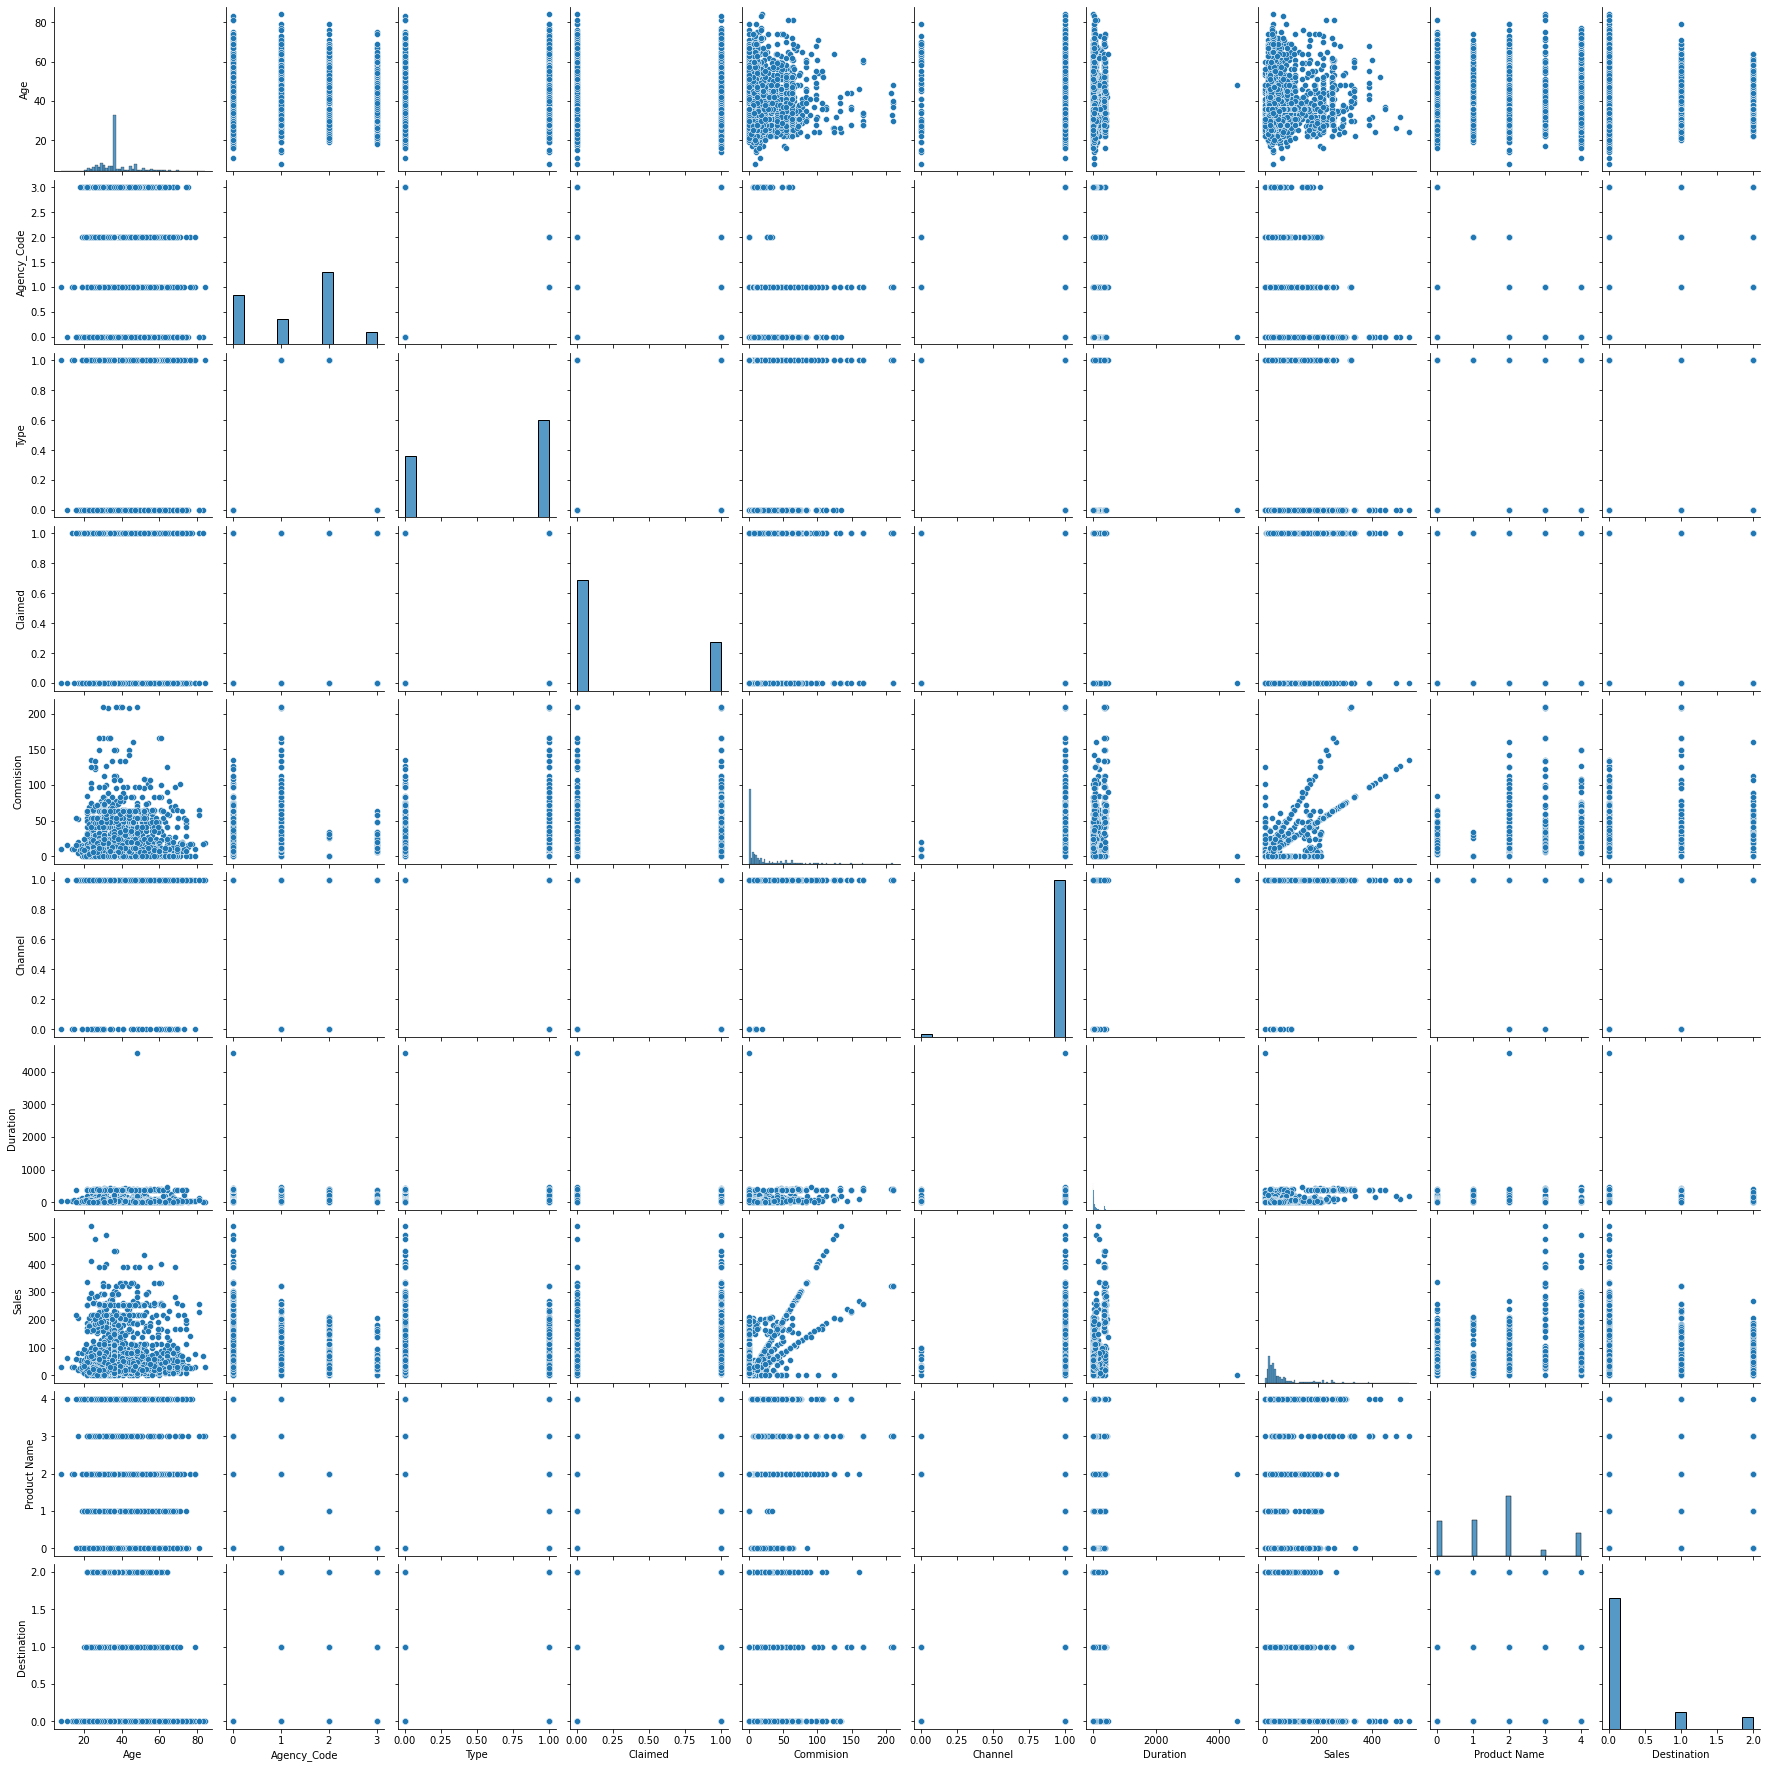

In [240]:
sns.pairplot(DF);

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network 
and
### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.


Capture the target column into separate vectors for training set and test set

In [241]:
X = DF.drop("Claimed", axis=1)

y = DF.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


Splitting data into training and test set

In [242]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [243]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [244]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [120]:
train_labels.value_counts()

0    1471
1     629
Name: Claimed, dtype: int64

In [121]:
train_labels.value_counts(normalize=True)

0    0.700476
1    0.299524
Name: Claimed, dtype: float64

In [122]:
test_labels.value_counts()

0    605
1    295
Name: Claimed, dtype: int64

In [123]:
test_labels.value_counts(normalize=True)

0    0.672222
1    0.327778
Name: Claimed, dtype: float64

Classification Model

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [126]:
dt_model.fit(X_train, train_labels,)

DecisionTreeClassifier(random_state=1)

In [127]:
from sklearn import tree

In [128]:
train_char_label = ['No', 'Yes']

In [129]:
DF_Tree_File = open('d:\DF_Tree_File.dot','w')

In [130]:
dot_data = tree.export_graphviz(dt_model, 
                                out_file=DF_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))


In [131]:
DF_Tree_File.close()

The above code will save a .dot file in your working directory.

WebGraphviz is Graphviz in the Browser.

Copy paste the contents of the file into the link below to get the visualization

http://webgraphviz.com/

In [132]:
dt_model.feature_importances_

array([0.17789443, 0.1947699 , 0.00038305, 0.09512657, 0.00726161,
       0.26212161, 0.19986441, 0.04325782, 0.0193206 ])

Regularising the Decision Tree,

In [133]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [134]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [135]:
DF_Tree_File_reg = open('d:\DF_Tree_File_reg.dot','w')

In [136]:
reg_dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=DF_Tree_File_reg, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

In [137]:
DF_Tree_File_reg.close()

The above code will save a .dot file in your working directory.

WebGraphviz is Graphviz in the Browser.

Copy paste the contents of the file into the link below to get the visualization.

http://webgraphviz.com/

In [182]:
reg_dt_model.feature_importances_

array([0.04849944, 0.51797205, 0.        , 0.03537162, 0.        ,
       0.07548799, 0.25731601, 0.06535289, 0.        ])

In [183]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns =["Imp"], index = X_train.columns))

                   Imp
Age           0.048499
Agency_Code   0.517972
Type          0.000000
Commision     0.035372
Channel       0.000000
Duration      0.075488
Sales         0.257316
Product Name  0.065353
Destination   0.000000


In [245]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [246]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


AUC: 0.836


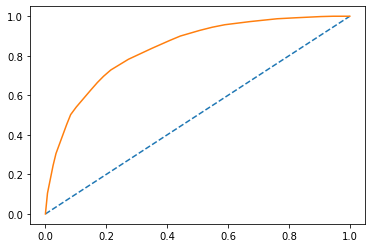

In [247]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.794


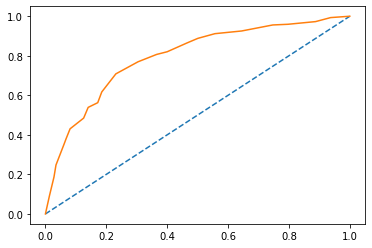

In [251]:
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion matrix for train data

In [252]:
confusion_matrix(train_labels, ytrain_predict)

array([[1349,  122],
       [ 313,  316]], dtype=int64)

In [253]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7928571428571428

In [254]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [270]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
DF=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(DF.loc["1"][2],2)
cart_train_recall=round(DF.loc["1"][1],2)
cart_train_precision=round(DF.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.74
cart_train_recall  0.61
cart_train_f1  0.67


### Confusion matrix for test data

In [256]:
confusion_matrix(test_labels, ytest_predict)

array([[564,  41],
       [183, 112]], dtype=int64)

In [257]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7511111111111111

In [258]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [271]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
DF=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(DF.loc["1"][0],2)
cart_test_recall=round(DF.loc["1"][1],2)
cart_test_f1=round(DF.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.73
cart_test_recall  0.47
cart_test_f1  0.58


#### Cart Conclusion

Train Data:  
AUC: 83.6%    
Accuracy: 79%   
Precision: 74%    
f1-Score: 67%


Test Data:       
AUC: 79.4%      
Accuracy: 75%    
Precision: 73%     
f1-Score: 58%      

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### Ensemble RandomForest Classifier

In [261]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [262]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [263]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [264]:
best_grid = grid_search.best_estimator_

In [272]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

In [273]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)


### RF on Train data

In [267]:
confusion_matrix(train_labels,ytrain_predict)

array([[1335,  136],
       [ 246,  383]], dtype=int64)

In [268]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8180952380952381

In [269]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [274]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
DF=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(DF.loc["1"][0],2)
rf_train_recall=round(DF.loc["1"][1],2)
rf_train_f1=round(DF.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


Area under Curve is 0.8744205676464645


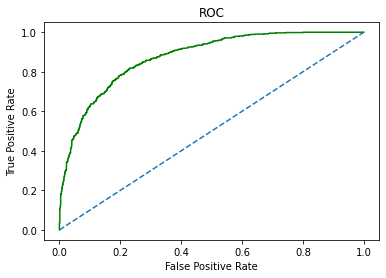

In [275]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF on test data

In [276]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  51],
       [155, 140]], dtype=int64)

In [277]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7711111111111111

In [278]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [279]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
DF=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(DF.loc["1"][0],2)
rf_test_recall=round(DF.loc["1"][1],2)
rf_test_f1=round(DF.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.47
rf_test_f1  0.58


Area under Curve is 0.8226586356632581


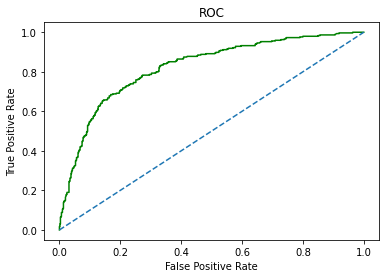

In [280]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [281]:

print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.349944
Sales         0.188456
Product Name  0.170146
Commision     0.100971
Duration      0.093409
Age           0.067548
Type          0.020343
Destination   0.008332
Channel       0.000851


#### Random Forest Conclusion

Train Data:   
AUC: 87%    
Accuracy: 82%    
Precision: 74%    
f1-Score: 61%    

Test Data:   
AUC: 82%    
Accuracy: 77%    
Precision: 73%    
f1-Score: 58%   

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### Neural Network Classifier

In [283]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [284]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [285]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [286]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### NN on Training data

In [287]:
confusion_matrix(train_labels,ytrain_predict)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

In [288]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7885714285714286

In [289]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [290]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
DF=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(DF.loc["1"][0],2)
nn_train_recall=round(DF.loc["1"][1],2)
nn_train_f1=round(DF.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under Curve is 0.8158261632688794


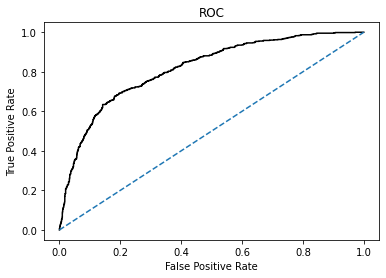

In [291]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### NN on Test data

In [292]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  58],
       [154, 141]], dtype=int64)

In [293]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7644444444444445

In [294]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [295]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
DF=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(DF.loc["1"][0],2)
nn_test_recall=round(DF.loc["1"][1],2)
nn_test_f1=round(DF.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


Area under Curve is 0.7827903067656534


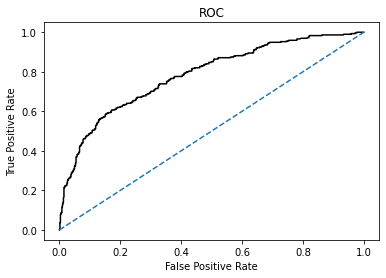

In [296]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [297]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

#### Neural Network Conclusion

Train Data:      
AUC: 82%  
Accuracy: 79%       
Precision: 67%    
f1-Score: 62%    

Test Data:    
AUC: 78%     
Accuracy: 76%     
Precision: 71%     
f1-Score: 57%       

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

### 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

Comparison of the performance metrix for 3 models

In [298]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.75,0.82,0.77,0.79,0.76
AUC,0.84,0.79,0.87,0.82,0.82,0.78
Recall,0.61,0.47,0.61,0.47,0.58,0.48
Precision,0.74,0.73,0.74,0.73,0.67,0.71
F1 Score,0.67,0.58,0.67,0.58,0.62,0.57


### ROC Curve for 3 models on Train data

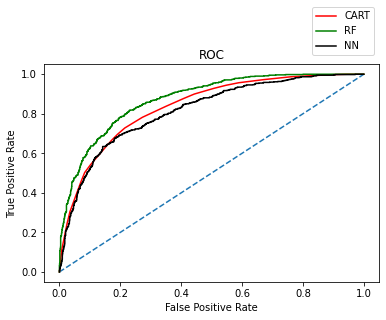

In [299]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

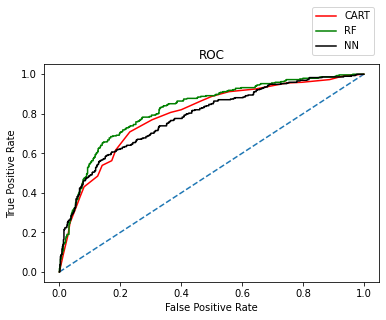

In [300]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonably stable enough to be used for making any future predictions. From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting the claim status or not. If change is yes, then the management facing higher claim frequency.

### 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Based on the 3 models of Data Mining, each model is performed and the values of precision, accuracy, f1- score, Recall, AUC and Roc curve are derived.
#### Model CART    
Train Data:
AUC: 83.6%    
Accuracy: 79%    
Precision: 74%    
f1-Score: 67%    

Test Data:    
AUC: 79.4%    
Accuracy: 75%    
Precision: 73%    
f1-Score: 58%    

#### Model Random Forest         
Train Data:    
AUC: 87%    
Accuracy: 82%    
Precision: 74%    
f1-Score: 61%     

Test Data:     
AUC: 82%      
Accuracy: 77%     
Precision: 73%     
f1-Score: 58%    

#### Model Neural Network     
Train Data:   
AUC: 82%    
Accuracy: 79%
Precision: 67%    
f1-Score: 62%    

Test Data:   
AUC: 78%    
Accuracy: 76%    
Precision: 71%    
f1-Score: 57%   

#### Recommendation:
Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting the claim status or not. If change is yes, then the management facing higher claim frequency.
Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model